In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import functools
import itertools
import shelve

import simpy
import scipy.stats
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [18]:
sdata = pd.read_csv("../data/squeued.20211111.cleaned.csv")
sdata2 = pd.read_csv("../data/squeued.20211111.mergedparts3.csv")

<AxesSubplot:>

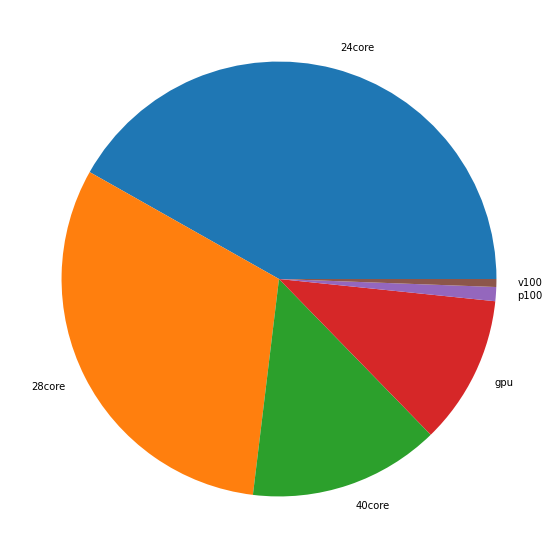

In [21]:
#sdata.PARTITION.value_counts().plot(kind="pie", ylabel="", figsize=(20, 10))
sdata2.MERGED_PARTITION.value_counts().plot(kind="pie", ylabel="", figsize=(20, 10))

In [9]:
sdata["DELAY"] = pd.DataFrame((pd.to_datetime(sdata.START_TIME) - pd.to_datetime(sdata.SUBMIT_TIME)) / np.timedelta64(1, "h"))

In [10]:
sdata[sdata.DELAY > 5/60].DELAY#.hist(bins=100, figsize=(20, 10))

0         2.891944
1       166.949722
2        34.761389
3        34.761667
12        6.521111
           ...    
4126      3.699444
4128      3.383611
4133      3.947778
4137      4.715278
4138      0.535000
Name: DELAY, Length: 1651, dtype: float64

In [11]:
1651/len(sdata)

0.398792270531401

<AxesSubplot:xlabel='Partition', ylabel='Number of Nodes'>

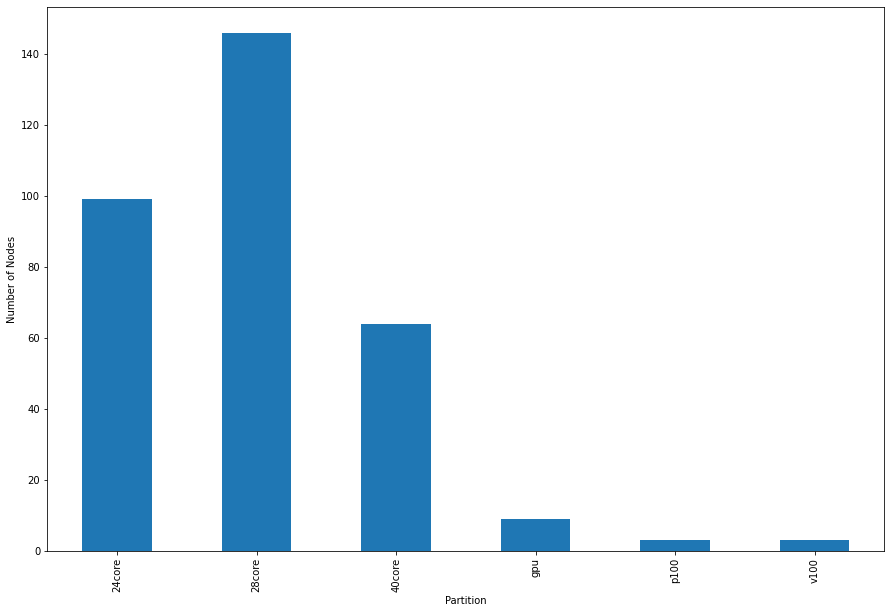

In [22]:
#sdata.groupby("PARTITION").EXEC_HOST.unique().apply(len).plot(kind="bar", ylabel="Number of Nodes", xlabel="Partition", figsize=(15, 10))
sdata2.groupby("MERGED_PARTITION").EXEC_HOST.unique().apply(len).plot(kind="bar", ylabel="Number of Nodes", xlabel="Partition", figsize=(15, 10))

In [13]:
sdata.groupby("PARTITION").EXEC_HOST.unique()

PARTITION
debug-28core       [login2, sn042, sn047, sn065, sn032, sn043, sn...
extended-24core    [cn047, cn051, cn084, cn015, cn057, cn087, cn0...
extended-28core    [sn029, sn028, login2, sn115, sn024, sn095, sn...
extended-40core    [dn039, dn010, dn022, dn034, dn018, dn048, dn0...
gpu                [login2, sn-nvda3, login1, sn-nvda7, sn-nvda8,...
gpu-large          [sn-nvda3, sn-nvda2, login1, sn-nvda6, sn-nvda...
gpu-long           [sn-nvda2, sn-nvda5, sn-nvda4, sn-nvda7, sn-nv...
large-28core                                                 [sn024]
large-40core                                                 [dn006]
long-24core        [cn076, cn085, cn026, cn071, cn081, cn088, cn0...
long-28core        [sn065, sn012, login1, login2, sn071, sn137, s...
long-40core        [dn007, dn044, dn027, dn036, dn031, login1, dn...
medium-24core                    [cn060, cn014, cn020, cn080, cn030]
medium-28core      [sn051, sn101, sn037, sn026, sn116, sn010, sn1...
medium-40core           